In [99]:
## importamos librerias
import pandas as pd
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import curve_fit

In [100]:
#puntos = puntos a  grafifcar
#f = funcion a graficar 
def grafico(puntos_x,puntos_y,f,tituloGrafico:str):
    PUNTO_X_MAX =  max(puntos_x)
    PUNTO_X_MIN = min(puntos_x)
    DOMINIO = 5
    #genero X_Y para el dominio de x
    #x_values = np.arange(PUNTO_X_MIN-DOMINIO,DOMINIO+PUNTO_X_MAX,step=1)
    x_values = puntos_x
    #genero X_Y para la imagen de y
    y_values = ([f(x) for x in x_values])
    # Agregar el eje de abscisas
    plt.axhline(y=0, color='black', linestyle='--')
    # Agregar el eje de ordenadas
    plt.axvline(x=0, color='black', linestyle='--')
    #agrego puntos calulados 
    plt.scatter(puntos_x,puntos_y,c="red")
    #ploteo el grafico
    plt.plot(x_values,y_values)
    #agrego labels
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(tituloGrafico)
    PUNTOS_Y_MIN = min(puntos_y)
    PUNTOS_Y_MAX = max(puntos_y)
    plt.ylim(PUNTOS_Y_MIN-DOMINIO,PUNTOS_Y_MAX+DOMINIO)
    #muestro el grafico
    plt.show()

### Ingesta de valores de x e y

In [101]:
#Lo pasamos a un array de numpy para ganar preformance
X_Y = pd.read_excel("ACUMULADOSvsDIAS.xlsx").to_numpy()
x_values = X_Y[:,0]
y_values = X_Y[:,1]

### X_Y necesarios para los calculos
![explicacion de datos](fotoExplicativa.png)

In [102]:
#x_values =  np.array, valores de x
#y_values =  np.array, valores de y
def datosFormula(x_values:np.ndarray,y_values:np.ndarray):
    XY = (x_values*y_values).reshape(-1,1)
    X_POW_2 = np.power(x_values,2).reshape(-1,1)
    Y_POW_2 = np.power(y_values,2).reshape(-1,1)
    DATES = np.concatenate((x_values.reshape(-1,1),y_values.reshape(-1,1),XY,X_POW_2,Y_POW_2),axis=1)
    
    ## realizamos la suma de todos los elementos de las filas para cada columna y sacamos su promedio
    return np.sum(DATES,axis=0)/X_Y.shape[0]

In [103]:
datosFormula(x_values,y_values)

array([8.50000000e+01, 5.74220414e+04, 8.22856786e+06, 9.60500000e+03,
       1.00411159e+10])

### coeficiente de correlación
![](fotoCorrelacion.png)

In [104]:
#x_values =  np.array, valores de x
#y_values =  np.array, valores de y
def corelacionParson(x_values:np.ndarray,y_values:np.ndarray):
    x_prom, y_prom, xy_prom, xpow_prom, ypow_prom= datosFormula(x_values,y_values)
    try: 
        r = (xy_prom-(x_prom*y_prom)) / ((np.sqrt((xpow_prom-(x_prom**2)))) * (np.sqrt((ypow_prom-(y_prom**2))))) 
    except:
        Exception("Divison por 0")
        
    return r

### Calculo por cuadrados minimos de a y b
![](fotoExplicativa1.png)

In [105]:
#x_values =  np.array, valores de x
#y_values =  np.array, valores de y
def calcA_BCuadradaosMinimos(x_values:np.ndarray,y_values:np.ndarray):
    """
        Esta funcion calcula la pendiente y el termino independiente por medio de cuadrados minimos
        para ecuaciones lineales o exponenciales linealizadas  
    """
    x_prom, y_prom, xy_prom, xpow_prom, _= datosFormula(x_values,y_values)
    
    #denominador identico para M y B
    DEN = ((xpow_prom) - (x_prom)**2)
    #vaidamos que no sea 0
    if (DEN == 0):
        Exception("Error: divison por 0")       
                            
    #calculamos la pendiente 
    A = ((xy_prom) - (x_prom*y_prom)) / DEN
    #calculamos el temrino independiente
    B = ((xpow_prom*y_prom) - (x_prom*xy_prom)) / DEN
    
    return A,B
    


## Pruebas para curva 1: y = ax +b

In [106]:
 
a,b = calcA_BCuadradaosMinimos(x_values,y_values)
ecuation = lambda x: a*x + b


In [107]:
print(a,b)

1406.5942618467504 -62138.470836855486


In [108]:
r = corelacionParson(x_values,np.array([ecuation(x_value) for x_value in x_values]))

In [109]:
print (r)

0.999999999999999


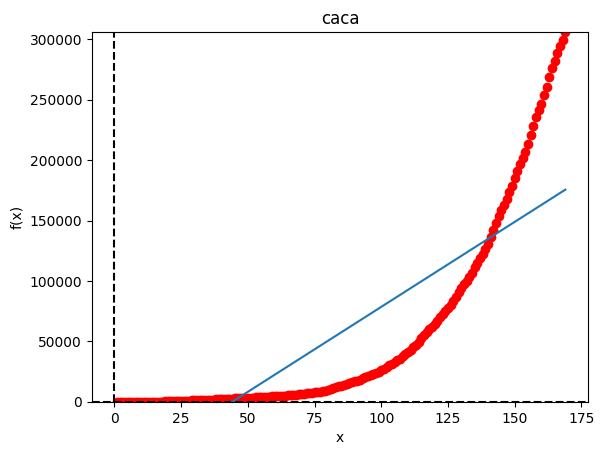

In [110]:
grafico(X_Y[:,0],X_Y[:,1],lambda x : a*x+b,"caca")

### Pruebita de curva 2: y = b*x^a ---> lineriazada: ln(y) = ln(b) + a ln(x) --> (x,y) = (ln(x),ln(y))

In [111]:
x = np.log(x_values)
y = np.log(y_values)
A,B = calcA_BCuadradaosMinimos(x,y)
##Como devuelve el ln(b) para poder utilizar la funcion no linearizada necesitamos b b es igaul a la inversa del ln
B = np.e**B
ecuation = lambda x : B * np.power(x, A)

In [112]:
print (A,B)

2.9105938150222803 0.04970033407026879


In [113]:
r = corelacionParson(x,y)

In [114]:
print(r)

0.9855059403492707


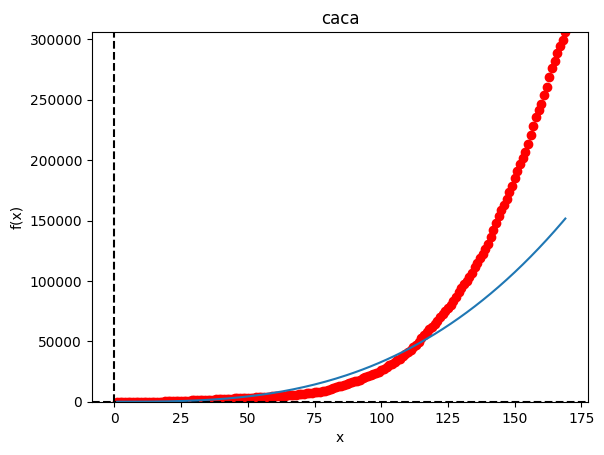

In [115]:
grafico(X_Y[:,0],X_Y[:,1],ecuation,"caca")

### Pruebita de curva 3: y = b*e^(a*x) ---> lineriazada: ln(y) = ln(b) + a*x --> (x,y) = (x,ln(y))

In [116]:
y = np.log(y_values)
A,B = calcA_BCuadradaosMinimos(x_values,y)
##Como devuelve el ln(b) para poder utilizar la funcion no linearizada necesitamos b b es igaul a la inversa del ln
B = np.e**B
ecuation = lambda x : B * np.power(np.e, (A*x))

In [117]:
print (A,B)

0.053943858723614166 89.43352511141735


In [118]:
r = corelacionParson(x_values,y)

In [119]:
print(r)

0.9417281327644651


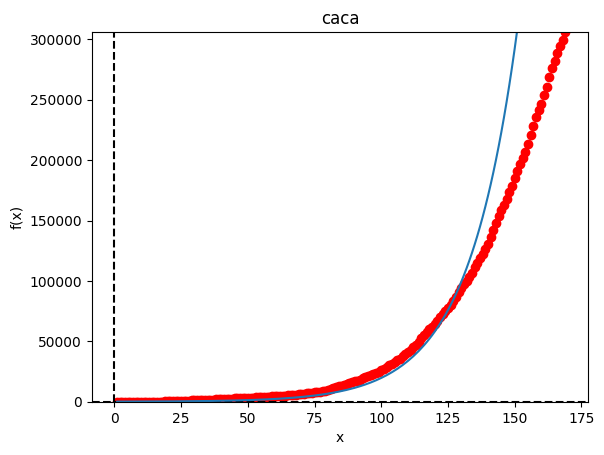

In [120]:
grafico(X_Y[:,0],X_Y[:,1],ecuation,"caca")